In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import zipfile
import os
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, f1_score



  

 


    

In [2]:
IMAGE_SIZE=(150, 150)
BATCH_SIZE=32
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
train_zip_path=r"c:\Users\Shamit\Downloads\Week4-train.zip"
test_zip_path=r"c:\Users\Shamit\Downloads\Week4-test.zip"
extracted_dir=r"c:\Users\Shamit\OneDrive\Desktop\all files\Week-4_Dataset"
with zipfile.ZipFile(train_zip_path, 'r') as train_zip:
    train_zip.extractall(extracted_dir)
with zipfile.ZipFile(test_zip_path, 'r') as test_zip:
    test_zip.extractall(extracted_dir)
data_dir=r"c:\Users\Shamit\OneDrive\Desktop\all files\Week-4_Dataset"
train_dir=os.path.join(data_dir)
test_dir=os.path.join(data_dir)

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(test_dir,target_size=(150, 150),batch_size=32,class_mode='binary')
base_model=VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

Found 697 images belonging to 2 classes.
Found 697 images belonging to 2 classes.




In [4]:
for layer in base_model.layers:
    layer.trainable=False
model = Sequential([base_model,Flatten(),Dense(256, activation='relu'),Dropout(0.5),Dense(1, activation='sigmoid')])
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
early_stop=EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history=model.fit(train_generator,steps_per_epoch=train_generator.samples // 32,epochs=20,  validation_data=validation_generator,validation_steps=validation_generator.samples // 32,callbacks=[early_stop])
validation_generator.reset()

Epoch 1/20



21/21 [==============================] - 308s 15s/step - loss: 0.8585 - accuracy: 0.6015 - val_loss: 0.3717 - val_accuracy: 0.8199
Epoch 2/20
21/21 [==============================] - 394s 19s/step - loss: 0.5304 - accuracy: 0.7233 - val_loss: 0.3737 - val_accuracy: 0.8289
Epoch 3/20
21/21 [==============================] - 321s 15s/step - loss: 0.4450 - accuracy: 0.7744 - val_loss: 0.3068 - val_accuracy: 0.8735
Epoch 4/20
21/21 [==============================] - 389s 19s/step - loss: 0.4545 - accuracy: 0.7654 - val_loss: 0.3129 - val_accuracy: 0.8720
Epoch 5/20
21/21 [==============================] - 205s 10s/step - loss: 0.3997 - accuracy: 0.8060 - val_loss: 0.2801 - val_accuracy: 0.8631
Epoch 6/20
21/21 [==============================] - 1134s 56s/step - loss: 0.4196 - accuracy: 0.8135 - val_loss: 0.2595 - val_accuracy: 0.8884
Epoch 7/20
21/21 [==============================] - 87s 4s/step - loss: 0.4029 - accuracy: 0.8211 - val_loss: 0.2604 - val_accuracy: 0.8943
Epoch 8/20
21/21 [

In [6]:
preds=model.predict(validation_generator)
pred_classes=(preds > 0.5).astype('int32')
true_classes=validation_generator.classes
accuracy=accuracy_score(true_classes, pred_classes)
f1=f1_score(true_classes, pred_classes)
dogs_count=sum(pred_classes==1)
cats_count=sum(pred_classes==0)
print(f"Found {dogs_count} images of dogs\n")
print(f"Found {cats_count} images of cats\n")

22/22 [==============================] - 32s 1s/step
Found [354] images of dogs

Found [343] images of cats



In [35]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("DOG",fontsize=30)
    elif val == 0:
        plt.xlabel("CAT",fontsize=30)


1/1 [==============================] - 0s 83ms/step
[[1.]]


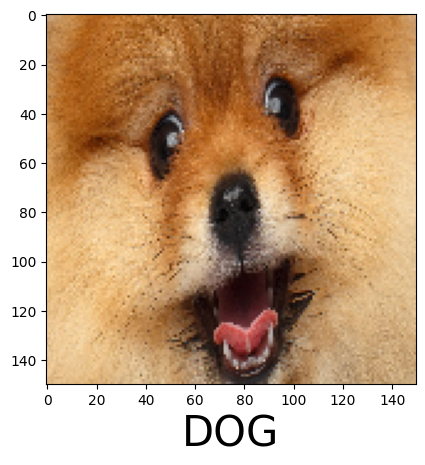

In [36]:
predictImage(r"C:\Users\Shamit\OneDrive\Desktop\all files\Week-4_Dataset\dogs\dog_68.jpg")

1/1 [==============================] - 0s 89ms/step
[[1.]]


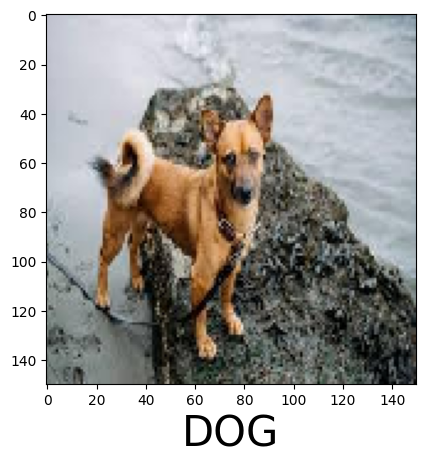

In [37]:
predictImage(r"C:\Users\Shamit\OneDrive\Desktop\all files\Week-4_Dataset\dogs\dog_75.jpg")

In [10]:
print(f"Accuracy score: {accuracy}\n")
print(f"F1 score: {f1}\n")

Accuracy score: 0.4806312769010043

F1 score: 0.48433048433048437

